In [5]:
import pandas as pd
from collections import Counter
import functionsForDataAnalysis as fd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [6]:
df=pd.read_csv('../data/clean/cleanedv5_jobListingsData.csv')

In [7]:
df_cleaned = df.dropna(subset=['Skill_Set'])

In [8]:
df_cleaned.loc[:,"work_mode"] = df_cleaned["work_mode"].fillna('Unknown')
df_cleaned.loc[:,"job_type"] = df_cleaned["job_type"].fillna('Unknown')

In [9]:
df_cleaned.shape

(3431, 11)

In [10]:
# Apply the function to the 'title' column
df_cleaned.loc[:,'Job_Title'] = df_cleaned.loc[:,'title'].apply(fd.categorize_job_title)

/var/folders/45/31xssp812hb_0pfhz6ffjqrc0000gn/T/ipykernel_39505/2996069921.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:,'Job_Title'] = df_cleaned.loc[:,'title'].apply(fd.categorize_job_title)


In [11]:
# Apply the mapping function to the 'Skill_Set' column
df_cleaned.loc[:,'Mapped_Skill_Set'] = df_cleaned.loc[:,'Skill_Set'].dropna().apply(fd.map_skill_set)


/var/folders/45/31xssp812hb_0pfhz6ffjqrc0000gn/T/ipykernel_39505/2761683651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:,'Mapped_Skill_Set'] = df_cleaned.loc[:,'Skill_Set'].dropna().apply(fd.map_skill_set)


### Frequency of skills overall

In [19]:
df_copy=df_cleaned.copy()

In [20]:
# Flatten all skills into a single list
#all_skillss = [skill.strip() for skills in df_copy["Skill_Set"].dropna() for skill in skills.split(',')]
all_skillss = [
    skill.strip() for skills in df_copy["Skill_Set"].dropna()
    for skill in skills.split(',') if skill.strip()  # Ignore empty strings
]

# Count occurrences of each skill
skill_countss = Counter(all_skillss)

# Convert to DataFrame for better visualization
skill_counts_dfs = pd.DataFrame(skill_countss.items(), columns=['Skill', 'Frequency']).sort_values(by='Frequency', ascending=False)

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns if needed

skill_count_dict_new={}
skill_count_dict_new = dict(zip(skill_counts_dfs["Skill"], skill_counts_dfs["Frequency"]))


In [21]:
skill_count_dict_new.pop('', None) 


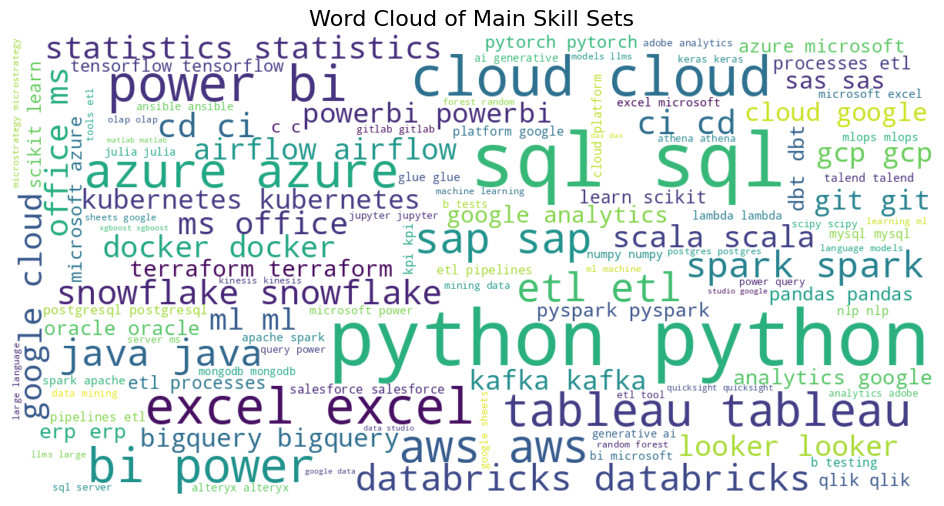

In [23]:
# Convert skill frequency dictionary into a string format required by WordCloud
#wordcloud_text = ' '.join([f"{skill} " * freq for skill, freq in skill_count_dict_new.items()])
wordcloud_text = ' '.join([f"{skill.strip().lower()} " * freq for skill, freq in skill_count_dict_new.items() if skill.strip()])

# Create WordCloud object
#wordcloud = WordCloud(width=1000, height=500, background_color="white", colormap="viridis").generate(wordcloud_text)
# Create WordCloud object with better visuals
wordcloud = WordCloud(
    width=1200, height=600,
    background_color="white",
    colormap="viridis",  # Change colormap for better colors
    prefer_horizontal=0.9,  # More horizontal words
    min_font_size=10,  # Minimum font size
    max_font_size=100  # Maximum font size
).generate(wordcloud_text)

#wordcloud = WordCloud(font_path="path_to_font.ttf", width=1200, height=600, background_color="black", colormap="coolwarm").generate(wordcloud_text)
# Plot the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide the axis
plt.title("Word Cloud of Main Skill Sets", fontsize=16)
plt.show()

In [27]:
df_copy.shape

(3431, 13)

In [12]:
# Flatten all skills into a single list
all_skills = [
    skill.strip() for skills in df_copy["Mapped_Skill_Set"].dropna()
    for skill in (skills if isinstance(skills, list) else skills.split(','))
]

# Count occurrences of each skill
skill_counts = Counter(all_skills)

# Convert to DataFrame for better visualization
skill_counts_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Frequency']).sort_values(by='Frequency', ascending=False)

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns if needed

skill_count_dict={}
skill_count_dict = dict(zip(skill_counts_df["Skill"], skill_counts_df["Frequency"])) 

# Print the top skills
display(skill_counts_df)

,Skill,Frequency
1,Python,1611
0,SQL,1608
8,GCP,752
3,Power BI,667
14,Excel/Google Sheets,585
16,R,577
20,Azure,516
22,AWS,469
2,Tableau,466
17,SAP,396


In [13]:

df_copy.to_csv('../data/clean/cleanedv7_jobListingsData.csv', index=False , encoding='utf-8' )

### Frequency of skills group by titles as Analyst , Engineer aand Scientist

In [14]:
df_germany_da=df_copy[(df_copy["Country"] == 'Germany') & (df_copy["Job_Title"] == 'Data Analyst')]
df_germany_ds=df_copy[(df_copy["Country"] == 'Germany') & (df_copy["Job_Title"] == 'Data Scientist')]
df_germany_de=df_copy[(df_copy["Country"] == 'Germany') & (df_copy["Job_Title"] == 'Data Engineer')]
df_spain_de=df_copy[(df_copy["Country"] == 'Spain') & (df_copy["Job_Title"] == 'Data Engineer')]
df_spain_da=df_copy[(df_copy["Country"] == 'Spain') & (df_copy["Job_Title"] == 'Data Analyst')]
df_spain_ds=df_copy[(df_copy["Country"] == 'Spain') & (df_copy["Job_Title"] == 'Data Scientist')]
df_data_analyst=df_copy[df_copy["Job_Title"] == 'Data Analyst']

In [13]:
df_data_analyst=df_copy[df_copy["Job_Title"] == 'Data Analyst']

In [28]:
df_germany_da.shape

(1350, 13)

In [29]:
df_spain_da.shape

(355, 13)

In [14]:
df_data_analyst.shape

(1726, 13)

In [15]:

# Flatten all skills into a single list
#all_skillss = [skill.strip() for skills in df_copy["Skill_Set"].dropna() for skill in skills.split(',')]
all_skillss = [
    skill.strip() for skills in df_data_analyst["Mapped_Skill_Set"].dropna()
    for skill in skills.split(',') if skill.strip()  # Ignore empty strings
]

# Count occurrences of each skill
skill_countss = Counter(all_skillss)

# Convert to DataFrame for better visualization
skill_counts_dfs = pd.DataFrame(skill_countss.items(), columns=['Skill', 'Frequency']).sort_values(by='Frequency', ascending=False)

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns if needed

print(skill_counts_dfs)


                  Skill  Frequency
0                   SQL        788
1                Python        628
14  Excel/Google Sheets        476
3              Power BI        469
2               Tableau        345
16                    R        344
17                  SAP        267
11                  GCP        242
18            MS Office        147
7    Google Data Studio        142
20                Azure        116
25            ETL Tools        113
5            Statistics        102
12     Google Analytics         87
23                  SAS         85
39                  ERP         78
4            Databricks         75
21            Snowflake         73
22                  AWS         73
37             BigQuery         65
10          A/B testing         61
6                  KPIs         56
29                 Java         53
31            Qliksense         53
33                  dbt         47
9               Airflow         43
32           Salesforce         36
28                  

In [17]:

# List of skills you're interested in
skills_to_check = ['Python', 'SQL', 'Power BI', 'Tableau','SAP','ERP']

# Dictionary to store counts of job_ids mentioning each skill
skill_counts = {skill: 0 for skill in skills_to_check}

# Loop over each row and check if the skill is mentioned in mapped-skill-set_column
for skill in skills_to_check:
    skill_counts[skill] = df_data_analyst["Mapped_Skill_Set"].apply(lambda x: skill in x).sum()

# Convert the skill_counts to a DataFrame to display it
skill_count_df = pd.DataFrame(list(skill_counts.items()), columns=['Skill', 'Job_Count'])

print(skill_count_df)


      Skill  Job_Count
0    Python        628
1       SQL        790
2  Power BI        469
3   Tableau        345
4       SAP        267
5       ERP         78


In [16]:
# Flatten all skills into a single list
#all_skillss = [skill.strip() for skills in df_copy["Skill_Set"].dropna() for skill in skills.split(',')]
all_skillss = [
    skill.strip() for skills in df_germany_da["Mapped_Skill_Set"].dropna()
    for skill in skills.split(',') if skill.strip()  # Ignore empty strings
]

# Count occurrences of each skill
skill_countss = Counter(all_skillss)

# Convert to DataFrame for better visualization
sc_df_germany_da = pd.DataFrame(skill_countss.items(), columns=['Skill', 'Frequency']).sort_values(by='Frequency', ascending=False)

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns if needed

print(sc_df_germany_da.shape)

(58, 2)


In [17]:
# Flatten all skills into a single list
#all_skillss = [skill.strip() for skills in df_copy["Skill_Set"].dropna() for skill in skills.split(',')]
all_skillss = [
    skill.strip() for skills in df_spain_da["Mapped_Skill_Set"].dropna()
    for skill in skills.split(',') if skill.strip()  # Ignore empty strings
]

# Count occurrences of each skill
skill_countss = Counter(all_skillss)

# Convert to DataFrame for better visualization
sc_df_spain_da = pd.DataFrame(skill_countss.items(), columns=['Skill', 'Frequency']).sort_values(by='Frequency', ascending=False)

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns if needed

print(sc_df_spain_da)

                  Skill  Frequency
7                   SQL        183
1   Excel/Google Sheets        144
4                Python        139
0              Power BI         88
3               Tableau         82
2                     R         67
6    Google Data Studio         44
24           Statistics         38
19                  SAP         36
13            ETL Tools         30
5           A/B testing         24
25                 KPIs         23
8      Google Analytics         20
20                  GCP         18
10                  SAS         17
9              BigQuery         16
17                  AWS         15
31   Scipy/scikit-learn         14
15            Snowflake         13
27                Azure         13
23                  ERP         10
32            Qliksense         10
21                  git         10
30            MS Office          9
11              Airflow          7
22           Salesforce          6
14           Databricks          6
29                CI

In [18]:
# Flatten all skills into a single list
#all_skillss = [skill.strip() for skills in df_copy["Skill_Set"].dropna() for skill in skills.split(',')]
all_skillss = [
    skill.strip() for skills in df_germany_ds["Mapped_Skill_Set"].dropna()
    for skill in skills.split(',') if skill.strip()  # Ignore empty strings
]

# Count occurrences of each skill
skill_countss = Counter(all_skillss)

# Convert to DataFrame for better visualization
sc_df_germany_ds = pd.DataFrame(skill_countss.items(), columns=['Skill', 'Frequency']).sort_values(by='Frequency', ascending=False)

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns if needed

print(sc_df_germany_ds)

                  Skill  Frequency
1                Python        259
3                   SQL        127
4                     R         93
6                    ML         82
2                   GCP         60
0                   AWS         59
44                 Java         54
7               PyTorch         47
34   Scipy/scikit-learn         47
9            TensorFlow         45
14                Spark         40
10                Azure         39
11           Statistics         39
29                Scala         35
16             NLTK/NLP         35
25               Docker         31
31              Tableau         26
17             Power BI         23
20                  SAP         22
12           Databricks         21
41            Snowflake         20
33                  SAS         16
23           Kubernetes         16
45                Keras         15
22                CI/CD         14
46        Random Forest         14
30                  git         14
5              BigQu

In [19]:
# Flatten all skills into a single list
#all_skillss = [skill.strip() for skills in df_copy["Skill_Set"].dropna() for skill in skills.split(',')]
all_skillss = [
    skill.strip() for skills in df_spain_ds["Mapped_Skill_Set"].dropna()
    for skill in skills.split(',') if skill.strip()  # Ignore empty strings
]

# Count occurrences of each skill
skill_countss = Counter(all_skillss)

# Convert to DataFrame for better visualization
sc_df_spain_ds= pd.DataFrame(skill_countss.items(), columns=['Skill', 'Frequency']).sort_values(by='Frequency', ascending=False)

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns if needed

print(sc_df_spain_ds)

                  Skill  Frequency
6                Python        128
0                   SQL         83
12                   ML         63
11                    R         48
4                   AWS         43
8            Statistics         36
13                  GCP         33
15                Azure         32
2                 Spark         28
20   Scipy/scikit-learn         27
32              PyTorch         25
22           Databricks         21
24           TensorFlow         20
23             NLTK/NLP         19
30             Power BI         17
3               Tableau         15
9                 Scala         14
37               Docker         14
1                   git         14
21           Kubernetes          9
14                CI/CD          9
10                 Java          9
31               Lambda          7
5                 Kafka          6
38          A/B testing          6
25              XGBoost          6
17            ETL Tools          6
40   Google Data Stu

In [20]:
# Flatten all skills into a single list
#all_skillss = [skill.strip() for skills in df_copy["Skill_Set"].dropna() for skill in skills.split(',')]
all_skillss = [
    skill.strip() for skills in df_germany_de["Mapped_Skill_Set"].dropna()
    for skill in skills.split(',') if skill.strip()  # Ignore empty strings
]

# Count occurrences of each skill
skill_countss = Counter(all_skillss)

# Convert to DataFrame for better visualization
sc_df_germany_de = pd.DataFrame(skill_countss.items(), columns=['Skill', 'Frequency']).sort_values(by='Frequency', ascending=False)

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns if needed

print(sc_df_germany_de)

                  Skill  Frequency
4                Python        360
2                   SQL        298
6                   GCP        262
1                 Azure        209
9                   AWS        190
26                 Java        130
8                 CI/CD        119
7                 Spark        108
15            ETL Tools        106
3            Databricks         99
22                Kafka         93
25                Scala         86
19            Snowflake         83
16               Docker         83
14           Kubernetes         78
11                  git         67
12              Airflow         66
10            Terraform         65
0              Power BI         58
13              Tableau         40
32          PostgresSQL         38
30                  dbt         38
18             BigQuery         38
5                    ML         37
20                    R         32
27                  SAP         30
39               Lambda         18
46                 G

In [21]:
# Flatten all skills into a single list
#all_skillss = [skill.strip() for skills in df_copy["Skill_Set"].dropna() for skill in skills.split(',')]
all_skillss = [
    skill.strip() for skills in df_spain_de["Mapped_Skill_Set"].dropna()
    for skill in skills.split(',') if skill.strip()  # Ignore empty strings
]

# Count occurrences of each skill
skill_countss = Counter(all_skillss)

# Convert to DataFrame for better visualization
sc_df_spain_de = pd.DataFrame(skill_countss.items(), columns=['Skill', 'Frequency']).sort_values(by='Frequency', ascending=False)

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns if needed

print(sc_df_spain_de.shape)

(49, 2)


In [26]:
# Define a list of (dataframe, country, job title) tuples
df_germany_da=df_copy[(df_copy["Country"] == 'Germany') & (df_copy["Job_Title"] == 'Data Analyst')]
df_germany_ds=df_copy[(df_copy["Country"] == 'Germany') & (df_copy["Job_Title"] == 'Data Scientist')]
df_germany_de=df_copy[(df_copy["Country"] == 'Germany') & (df_copy["Job_Title"] == 'Data Engineer')]
df_spain_de=df_copy[(df_copy["Country"] == 'Spain') & (df_copy["Job_Title"] == 'Data Engineer')]
df_spain_da=df_copy[(df_copy["Country"] == 'Spain') & (df_copy["Job_Title"] == 'Data Analyst')]
df_spain_ds=df_copy[(df_copy["Country"] == 'Spain') & (df_copy["Job_Title"] == 'Data Scientist')]


df_list = [
    (df_germany_da, "Germany", "Data Analyst"),
    (df_germany_ds, "Germany", "Data Scientist"),
    (df_germany_de, "Germany", "Data Engineer"),
    (df_spain_da, "Spain", "Data Analyst"),
    (df_spain_ds, "Spain", "Data Scientist"),
    (df_spain_de, "Spain", "Data Engineer")
]

# List to store all skill DataFrames
all_skill_dfs = []

# Process each DataFrame
for df, country, job_title in df_list:
    # Extract and clean skills
    all_skills = [
        skill.strip()
        for skills in df["Mapped_Skill_Set"].dropna()
        for skill in skills.split(',') if skill.strip()
    ]

    # Count occurrences of each skill
    skill_counts = Counter(all_skills)

    # Convert to DataFrame
    skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Frequency'])
    
    # Add Country and Job Title columns directly
    skill_df["Country"] = country
    skill_df["Job_Title"] = job_title
    print(f" {country}  : {job_title} : {skill_df.shape}")
    # Store the processed DataFrame
    all_skill_dfs.append(skill_df)

#  Concatenate all DataFrames
final_df_use = pd.concat(all_skill_dfs, ignore_index=True)

#  Save to CSV
final_df_use.to_csv("../data/clean/cleanedv8_country_title.csv", index=False)

#  Print final DataFrame (for verification)
print(final_df_use.head())


 Germany  : Data Analyst : (58, 4)
 Germany  : Data Scientist : (57, 4)
 Germany  : Data Engineer : (60, 4)
 Spain  : Data Analyst : (50, 4)
 Spain  : Data Scientist : (48, 4)
 Spain  : Data Engineer : (49, 4)
        Skill  Frequency  Country     Job_Title
0         SQL        586  Germany  Data Analyst
1      Python        470  Germany  Data Analyst
2     Tableau        252  Germany  Data Analyst
3    Power BI        373  Germany  Data Analyst
4  Databricks         69  Germany  Data Analyst
